# 1. Recap

In the last mission, we focused on increasing the number of attributes the model uses. We saw how, in general, **adding more attributes generally lowered the error of the model. This is because the model is able to do a better job identifying the living spaces from the training set that are the most similar to the ones from the test set.** However, **we also observed how using all of the available features didn't actually improve the model's accuracy automatically and that some of the features were probably not relevant for similarity ranking.** We learned that selecting relevant features was the right lever when improving a model's accuracy, not just increasing the features used in the absolute.

In this mission, we'll focus on the impact of increasing k, the number of nearby neighbors the model uses to make predictions. We exported both the training (train_df) and test sets (test_df) from the last missions to CSV files, dc_airbnb_train.csv and dc_airbnb_test.csv respectively. Let's read both these CSV's into Dataframes.

In [100]:
import pandas as pd

train_df = pd.read_csv('dc_airbnb_train.csv')
test_df = pd.read_csv('dc_airbnb_test.csv')

# 2. Hyperparameter Optimization

When we vary the features that are used in the model, we're affecting the data that the model uses. On the other hand, varying the k value affects the behavior of the model independently of the actual data that's used when making predictions. In other words, we're impacting how the model performs without trying to change the data that's used.

Values that affect the behavior and performance of a model that are unrelated to the data that's used are referred to as hyperparameters. The process of finding the optimal hyperparameter value is known as hyperparameter optimization. A simple but common hyperparameter optimization technique is known as grid search, which involves:

- selecting a subset of the possible hyperparameter values,
- training a model using each of these hyperparameter values,
- evaluating each model's performance,
- selecting the hyperparameter value that resulted in the lowest error value.

Grid search essentially boils down to evaluating the model performance at different k values and selecting the k value that resulted in the lowest error. While grid search can take a long time when working with large datasets, the data we're working with in this mission is small and this process is relatively quick.

Let's confirm that grid search will work quickly for the dataset we're working with by first observing how the model performance changes as we increase the k value from 1 to 5. If you recall, we set 5 as the k value for the last 2 missions. Let's use the features from the last mission that resulted in the best model accuracy:

    accommodates
    bedrooms
    bathrooms
    number_of_reviews


In [101]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as mse

features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']

hyper_params = [1,2,3,4,5]
mse_values = []

for i in hyper_params:
    knr = KNeighborsRegressor(n_neighbors=i,algorithm='brute')
    knr.fit(train_df[features],train_df['price'])
    predictions = knr.predict(test_df[features])
    mse_values.append(mse(test_df['price'],predictions))
    
mse_values

[26364.928327645051,
 15100.522468714449,
 14578.804070281883,
 15946.721060864618,
 14119.735836177475]

# 3. Expanding Grid Search
Since our dataset is small and scikit-learn has been developed with performance in mind, the code ran quickly. As we increased the k value from 1 to 5, the MSE value fell from approximately 26364 to approximately 14090. Let's expand grid search all the way to a k value of 20. While 20 may seem like an arbitrary ending point for our grid search, we can always expand the values we try if we're unconvinced that the lowest MSE value is associated with one of the hyperparamter values we tried so far.

In [102]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as mse

features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']

hyper_params = list(range(1,21))
mse_values = []

for i in hyper_params:
    knr = KNeighborsRegressor(n_neighbors=i,algorithm='brute')
    knr.fit(train_df[features],train_df['price'])
    predictions = knr.predict(test_df[features])
    mse_values.append(mse(test_df['price'],predictions))
    
mse_values


[26364.928327645051,
 15100.522468714449,
 14578.804070281883,
 15946.721060864618,
 14119.735836177475,
 13495.781569965869,
 14209.360474565252,
 14615.818988196814,
 14591.371971516453,
 14608.888509670078,
 14747.643537453343,
 14802.514876437872,
 14726.607851848858,
 14788.004486777645,
 14775.071925167487,
 14846.632372546928,
 14801.420334526101,
 14761.434233626876,
 14750.644695086017,
 14653.391259954493]

In [103]:
mse_values

[26364.928327645051,
 15100.522468714449,
 14578.804070281883,
 15946.721060864618,
 14119.735836177475,
 13495.781569965869,
 14209.360474565252,
 14615.818988196814,
 14591.371971516453,
 14608.888509670078,
 14747.643537453343,
 14802.514876437872,
 14726.607851848858,
 14788.004486777645,
 14775.071925167487,
 14846.632372546928,
 14801.420334526101,
 14761.434233626876,
 14750.644695086017,
 14653.391259954493]

# 4. Visualizing Hyperparameter Values
As we increased the k value from 1 to 6, the MSE value decreased from approximately 26364 to approximately 13657. However, as we increased the k value from 7 to 20, the MSE value didn't decrease further but instead hovered between approximately 14288 and 14870. This means that the optimal k value is 6, since it resulted in the lowest MSE value.

This pattern is something you'll notice while performing grid search across other models as well. As you increase k at first, the error rate decreases until a certain point, but then rebounds and increases again. Let's confirm this behavior visually using a scatter plot.

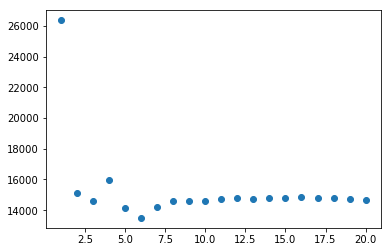

In [104]:
import matplotlib.pyplot as plt

plt.scatter(hyper_params,mse_values)
plt.show()

# 5. Varying Features and Hyperparameters

From the scatter plot, you can tell that the lowest MSE value was achieved at the k value of 6. As we increased k past 6, the MSE actually increased and hovered but never decreased below 13657 (the approximate MSE value when k was 6).

Since varying the k value decreased the MSE value for this model, you may be wondering if repeating the grid search process for one of the models from the last mission that performed poorly when we fixed k to 5 would result in a lower MSE value. Let's try it out!

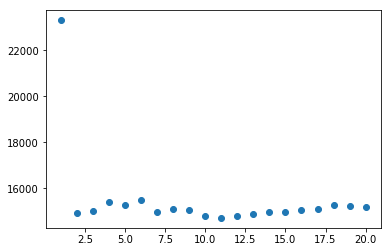

In [105]:
hyper_params = [x for x in range(1,21)]
mse_values = list()
features = train_df.columns.tolist()
features.remove('price')

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)

plt.scatter(hyper_params, mse_values)
plt.show()

# 6. Practice the Workflow
You may have noticed that the general workflow for finding the best model is:

- select relevant features to use for predicting the target column.
- use grid search to find the optimal hyperparameter value for the selected features.
- evaluate the model's accuracy and repeat the process.

Let's now practice this workflow.

In [109]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as mse

two_features = ['accommodates', 'bathrooms']
three_features = ['accommodates', 'bathrooms', 'bedrooms']
hyper_params = list(range(1,21))

# Append the first model's MSE values to this list.
two_mse_values = list()
for i in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=i,algorithm = 'brute')
    knn.fit(train_df[two_features],train_df['price'])
    predictions = knn.predict(test_df[two_features])
    two_mse_values.append(mse(test_df['price'],predictions))

mse_df=pd.DataFrame({'k':hyper_params,'mse_vals': two_mse_values})
mse_df_sorted = mse_df.sort_values(by='mse_vals')
two_hyp_mse = {mse_df_sorted.iloc[0][0]:mse_df_sorted.iloc[0][1]}

# Append the second model's MSE values to this list.
three_mse_values = list()
for i in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=i,algorithm = 'brute')
    knn.fit(train_df[three_features],train_df['price'])
    predictions = knn.predict(test_df[three_features])
    three_mse_values.append(mse(test_df['price'],predictions))

mse_df=pd.DataFrame({'k':hyper_params,'mse_vals': three_mse_values})
mse_df_sorted = mse_df.sort_values(by='mse_vals')
three_hyp_mse = {mse_df_sorted.iloc[0][0]:mse_df_sorted.iloc[0][1]}

print(two_hyp_mse)
print(three_hyp_mse)


{5.0: 14790.314266211606}
{7.0: 13518.769009310208}


# 7. Next Steps
The first model, which used the accommodates and bathrooms columns, was able to achieve an MSE value of approximately 14790. The second model, which added the bedrooms column, was able to achieve an MSE value of approximately 13522.9, which is even lower than the lowest MSE value we achieved using the best model from the last mission (which used the accommodates, bedrooms, bathrooms, and number_of_reviews columns). Hopefully **this demonstrates that using just one lever to find the best model isn't enough and you really want to use both levers in conjunction.**

In this mission, we learned about hyperparameter optimization and the workflow of finding the optimal model to make predictions. Next in this course is a challenge, where you'll practice the concepts you've learned so far on a completely new dataset.